<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# Panorama do COVID-19 no Brasil e no mundo

COVID-19 é uma doença infecciosa causada por um recém-descoberto coronavírus.
O primeiro caso oficial de covid-19 (coronavirus disease 2019) foi de um paciente hospitalizado no dia 12 de dezembro de 2019 em Wuhan, China, mas estudos retrospectivos detectaram um caso clínico com sintomas da doença em 01/12/19. O primeiro artigo científico, publicado algumas semanas depois por pesquisadores chineses, descreveu o caso de um paciente de 41 anos admitido no Hospital Central de Wuhan em 26 de dezembro. O fluido broncoalveolar continha um vírus cujo genoma mostrou uma relação filogenética com coronavírus causadores da Sars e Mers. O vírus, denominado WHCV (posteriormente 2019-nCoV e finalmente Sars-CoV-2), mostrou alta similaridade genômica com o Bat SL-CoVZC45, um vírus obtido de um morcego coletado na China. Esse resultado sugeriu que esse novo coronavírus poderia ter se originado de morcegos, um reservatório já identificado para o Sars-CoV, agente da Sars.

<center><img alt="Colaboratory logo" width="25%" src="https://raw.githubusercontent.com/inaepmachado/Portfolio/master/imagens/covid.jpeg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela. No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

Para este estudo iremos utilizar como fonte de dados o [site](https://ourworldindata.org/coronavirus). Como eles mesmos se denominam, Our World in Data trata de pesquisa e dados para avançar contra os maiores problemas do mundo. Para entender os problemas que estão afetando bilhões, precisamos de dados, precisamos medir cuidadosamente com o que nos preocupamos e tornar os resultados acessíveis em uma plataforma compreensível e pública.

Our World in Data e SDG-Tracker são esforços colaborativos entre pesquisadores da Universidade de Oxford, que são os editores científicos do conteúdo do site; e a organização sem fins lucrativos Global Change Data Lab , que publica e mantém o site e as ferramentas de dados que tornam nosso trabalho possível. É uma organização sem fins lucrativos, o financiamento é uma das principais preocupações para tornar possível o trabalho diário, tendo como apoiadores grandes organizações como Fundação Bill e Melinda Gates e pessoas comuns, como nós estudantes que utilizam dados como forma de viver e, principlamente, fazer diferença em sociedade.

### Dicionário de Variáveis
Os dados estão disponíveis em um **GitHub**, onde também podemos encontrar a  descrição das variáveis [link](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data-codebook.md).

A atualização dos dados é diária, sendo que para este estudo utilizamos a atualização do dia *05/julho/2020*.

### Importando os dados do COVID-19

Os dados foram importados do endereço [https://github.com/owid/covid-19-data/tree/master/public/data](https://github.com/owid/covid-19-data/tree/master/public/data)  no formato `csv`.

In [ ]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Análise Exploratória dos Dados

A primeira parte de qualquer estudo é fazer uma análise exploratória para entendermos os dados que estamos trabalhando, qual o tamanho da nossa base, quais tipos e formas de dados temos, se há muitos dados ausentes e, por fim, a distribuição dos dados, com a possível identificação de outliers.

Vamos iniciar conhecendo as dimensões da nossa base.

In [ ]:
# Dimensões
print('\nTamanho da base:', df.shape[0],
      '\nQuantidade de variáveis:', df.shape[1])

# Primeiras entradas
df.head()


Tamanho da base: 28453 
Quantidade de variáveis: 34


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [ ]:
# Quais colunas nosso dataframe possui?
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

Outro ponto importante é entendermos os tipos das variáveis, pois caso haja necessidade de ajuste, podemos fazer logo no início:
* variáveis de data estão como data ou texto
* variáveis numéricas estão com numéricas ou texto

E assim por diante.

In [ ]:
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

Como podemos ver, a variável `date` está como `object`, ou seja, texto. Precisamos transformar esta variável em data, para que possamos trabalhar com a visão de progressão no tempo da doença, por exemplo.

In [ ]:
# Transforma a coluna `date` em datetime
df.date = pd.to_datetime(df.date)

Outro ponto importante é vermos a existência da dados ausentes.

In [ ]:
# Dados Ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

new_tests                          0.721892
new_tests_per_thousand             0.721892
total_tests_per_thousand           0.706042
total_tests                        0.706042
new_tests_smoothed_per_thousand    0.684778
new_tests_smoothed                 0.684778
tests_units                        0.662496
handwashing_facilities             0.590623
extreme_poverty                    0.404140
male_smokers                       0.287140
female_smokers                     0.278705
stringency_index                   0.201877
hospital_beds_per_thousand         0.175939
aged_65_older                      0.110920
gdp_per_capita                     0.108460
aged_70_older                      0.102696
median_age                         0.098056
cvd_death_rate                     0.097002
diabetes_prevalence                0.067480
population_density                 0.044038
life_expectancy                    0.013953
new_deaths_per_million             0.010122
total_deaths_per_million        

Podemos ver um alto volume de dados ausentes nas primeiras variáveis acima, `new_tests` e `total_tests`, por exemplo. 
Devemos excluir essas linhas por haver 72% de dados ausentes, ou, devemos desconsiderar o banco de dados completo e concluirmos que a fonte não é apropriada?
**Não!**

Dependendo do estudo que estamos fazendo, precisamos primeiro entender se o valor ausente é ausência de informação ou se a falta da informação é por si só uma informação. Além disso, como estamos utilizando dados públicos e que dependem de várias fontes, também devemos entender quais as fontes que compõe o banco de dados, para que, mesmo que alguma variável não seja utilizada, não tira a importância das demais.

No caso em questão, as variáveis `de testes` do COVID, além de terem vindo de fontes diferentes de cada país, nem todos os países estão fazendo testes na população.

Isso mostra a importância de se entender um pouco do assunto que está sendo estudado. Não precisamos entender com profundidade, afinal nossa expertise é tirar informações úteis a partir dos dados, mas conhecer um pouco sobre o que estamos estudando é de fundamental importância para fazermos uma interpretação correta dos dados analisados.

### Análise Exploratória Mundial

Analisando a descrição das variáveis, podemos ver que o banco de dados apresenta alguns dados com informações acumuladas ao longo dos dias. Por exemplo, `total_cases` e `total_deaths`.

Com isso, considerando somente o último dia, conseguimos ver algumas informações do andamento da doença nos países.

In [ ]:
# Data mais recente do estudo
df.date.max()

Timestamp('2020-07-06 00:00:00')

Como estão os dados no último dia mais atualizado da base?

In [ ]:
# Filtrando último dia e ordenando pelo total de casos
df.loc[df.date == '2020-07-05'].sort_values(by = 'total_cases', ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
28387,OWID_WRL,NaN,World,2020-07-05,11240740.0,189605.0,530581.0,4344.0,1442.082,24.325,68.069,0.557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58
27073,USA,North America,United States,2020-07-05,2839542.0,45221.0,129676.0,242.0,8578.608,136.618,391.767,0.731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86
3851,BRA,South America,Brazil,2020-07-05,1577004.0,37923.0,64265.0,1091.0,7419.121,178.411,302.339,5.133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88
21471,RUS,Europe,Russia,2020-07-05,674515.0,6632.0,10027.0,168.0,4622.041,45.445,68.709,1.151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050,72.58
12035,IND,Asia,India,2020-07-05,673165.0,24850.0,19268.0,613.0,487.799,18.007,13.962,0.444,9789066.0,248934.0,7.094,0.18,223038.0,0.162,samples tested,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.900,20.600,59.55,0.530,69.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22680,SYC,Africa,Seychelles,2020-07-05,11.0,0.0,0.0,0.0,111.857,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.834000e+04,208.354,36.2,8.606,5.586,26382.287,1.1,242.648,10.55,7.100,35.700,NaN,3.600,73.40
17577,MSR,North America,Montserrat,2020-07-05,11.0,0.0,1.0,0.0,2200.440,0.000,200.040,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.999000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.16
3953,VGB,North America,British Virgin Islands,2020-07-05,8.0,0.0,1.0,0.0,264.577,0.000,33.072,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.023700e+04,207.973,NaN,NaN,NaN,NaN,NaN,NaN,13.67,NaN,NaN,NaN,NaN,79.07
3449,BES,North America,Bonaire Sint Eustatius and Saba,2020-07-05,7.0,0.0,0.0,0.0,266.962,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.622100e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.79


Analisando a tabela acima, podemos tirar alguns insights:

**1)** O total de casos do COVID no mundo está em 11.241.655, com total de 530.668 mortes.

**2)** O primeiro país com mais casos é os Estados Unidos, com 2.839.542 casos e 129.676 mortes, seguido do nosso país Brasil, com 1.577.004 casos e 64.265 mortes.

In [ ]:
df.loc[df.date == '2020-07-05'].sort_values(by = 'total_deaths', ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
28387,OWID_WRL,NaN,World,2020-07-05,11240740.0,189605.0,530581.0,4344.0,1442.082,24.325,68.069,0.557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58
27073,USA,North America,United States,2020-07-05,2839542.0,45221.0,129676.0,242.0,8578.608,136.618,391.767,0.731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86
3851,BRA,South America,Brazil,2020-07-05,1577004.0,37923.0,64265.0,1091.0,7419.121,178.411,302.339,5.133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88
26884,GBR,Europe,United Kingdom,2020-07-05,284900.0,624.0,44198.0,67.0,4196.741,9.192,651.062,0.987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.000,24.700,NaN,2.540,81.32
13266,ITA,Europe,Italy,2020-07-05,241419.0,235.0,34854.0,21.0,3992.916,3.887,576.463,0.347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.046183e+07,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.800,27.800,NaN,3.180,83.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9411,PYF,Oceania,French Polynesia,2020-07-05,62.0,0.0,0.0,0.0,220.716,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.809040e+05,77.324,32.7,7.775,4.593,NaN,NaN,NaN,22.63,NaN,NaN,NaN,NaN,77.66
20125,PNG,Oceania,Papua New Guinea,2020-07-05,11.0,0.0,0.0,0.0,1.229,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.947027e+06,18.220,22.6,3.808,2.142,3823.194,NaN,561.494,17.65,23.500,48.800,NaN,NaN,64.50
7414,DMA,North America,Dominica,2020-07-05,18.0,0.0,0.0,0.0,250.031,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.199100e+04,98.567,NaN,NaN,NaN,9673.367,NaN,227.376,11.62,NaN,NaN,NaN,3.800,75.00
8923,FJI,Oceania,Fiji,2020-07-05,18.0,0.0,0.0,0.0,20.079,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.964440e+05,49.562,28.6,6.224,3.284,8702.975,1.4,412.820,14.49,10.200,34.800,NaN,2.300,67.44


Podemos ver que os dois países com maior número de casos e também maior número de mortes são, respectivamente, Estados Unidos e Brasil. Mas abaixo faremos uma visão específica e detalhada do nosso país, Brasil.

Para melhor visualizar e ilustrar nosso estudo, vamos plotar o número de mortes abaixo para os 5 maiores países com mais casos de morte por COVID.

In [ ]:
# Filtro dos top 5 por mortes de COVID
top5_deaths = df.loc[df.date == '2020-07-05', ['location', 'total_deaths']].sort_values(by = 'total_deaths', ascending=False)[1:6]

# Conferindo filtro aplicado
top5_deaths.head()

,location,total_deaths
27073,United States,129676.0
3851,Brazil,64265.0
26884,United Kingdom,44198.0
13266,Italy,34854.0
16950,Mexico,30366.0


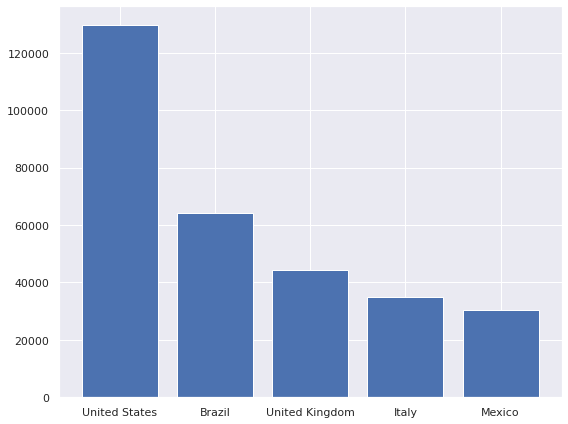

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

ax.bar('location', 'total_deaths', data=top5_deaths)

plt.tight_layout()

Como o vírus está progredindo no mundo e nesses maiores países ao longo do tempo?
Uma das principais preocupações é essa, como o contágio está progredindo ao longo do tempo, para ver como é possível preparar todo o sistema de saúde dos países para conseguir a demanda, principalmente para os 5% dos casos que irão precisar de ventilação assistida.

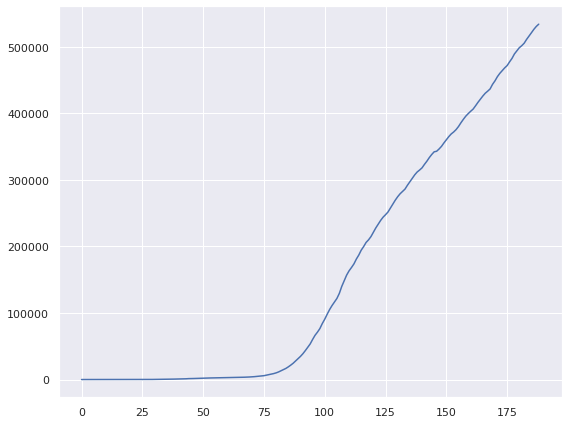

In [ ]:
# gráfico de linha para contaminação no mundo e nos dois maiores países, Estados Unidos e Brasil
df.loc[df.location == 'World', 'total_deaths'].reset_index(drop=True).plot(figsize=(8,6));

plt.tight_layout()

### Análise Exploratória para o Brasil

Sabemos que a situação brasileira está crítica, com mais de 1 milhão e meio de casos registrados e quase 65 mil mortes.

Aqui vamos detalhar quando os primeiros casos foram registrados e como está a evolução da doença no país.

In [ ]:
# Cria base para Brasil, filtrando ´location´
df_br = df.loc[df.location == "Brazil"].copy()

df_br.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3664,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3665,BRA,South America,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3666,BRA,South America,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3667,BRA,South America,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3668,BRA,South America,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [ ]:
# Identificação do primeiro e último dia mais atualizado de Contaminação e Morte
print('Primeiro caso de contágio pelo COVID registrado no Brasil:', df_br.loc[df_br['total_cases'] != 0.0].date.min())
print('Último caso atualizado de contágio pelo COVID no Brasil:', df_br.loc[df_br['total_cases'] != 0.0].date.max())

print('\nPrimeiro caso de morte pelo COVID registrado no Brasil:', df_br.loc[df_br['new_deaths'] != 0.0].date.min())
print('Último caso atualizado de morte pelo COVID no Brasil:', df_br.loc[df_br['new_deaths'] != 0.0].date.max())

Primeiro caso de contágio pelo COVID registrado no Brasil: 2020-02-26 00:00:00
Último caso atualizado de contágio pelo COVID no Brasil: 2020-07-06 00:00:00

Primeiro caso de morte pelo COVID registrado no Brasil: 2020-03-18 00:00:00
Último caso atualizado de morte pelo COVID no Brasil: 2020-07-06 00:00:00


In [ ]:
# Calcula o tempo de diferença entre a primeira contaminação e a primeira morte
from datetime import date

dif_cont = abs(date(2020,7,6)-date(2020,2,26)).days
dif_morte = abs(date(2020,3,18)-date(2020,2,26)).days
print('Estamos há {} dias corridos com casos de COVID sendo registrados.'.format(dif_cont))
print('A diferença entre o primeiro contágio e a primeira morte foi de {} dias.'.format(dif_morte))

Estamos há 131 dias corridos com casos de COVID sendo registrados.
A diferença entre o primeiro contágio e a primeira morte foi de 21 dias.


Como podemos ver nos cálculos acima, estamos há 131 dias com contágio ativo no Brasil. O primeiro caso de contágio registrado do vírus foi no dia 26 de fevereiro, ocorrendo a morte após 21 dias, em 18 de março.

Como a doença está evoluindo?

Vamos plotar gráficos de linhas para vermos a evolução de casos registrados e mortes ao longo desses 131 dias.

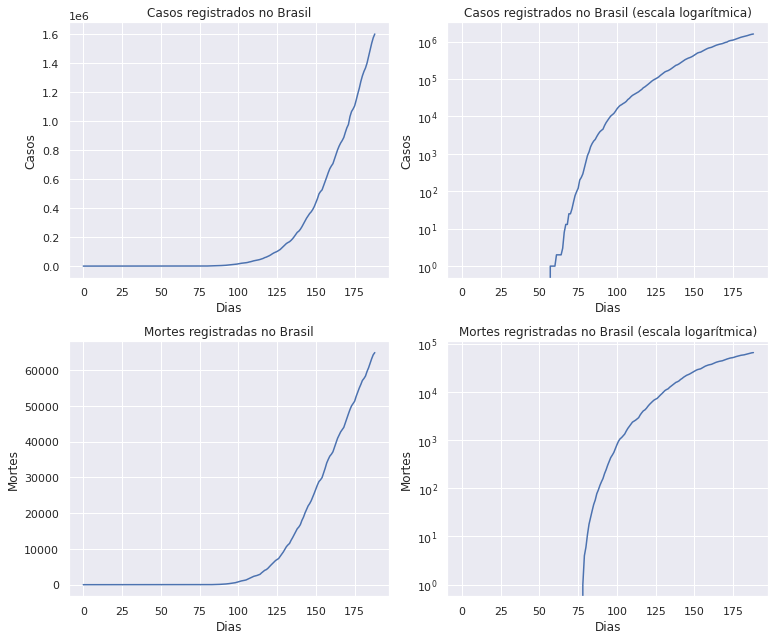

In [ ]:
# Gráficos de linha 'normal' e ' com escala logarítmica'

# Para o x, consideramos a quantidade de registros que temos na variável 'total_cases'
x = list(range(df_br.total_cases.shape[0]))

casos = df_br['total_cases']
mortes = df_br['total_deaths']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(11,9))

ax1.set_title('Casos registrados no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x,casos)

ax2.set_title('Casos registrados no Brasil (escala logarítmica)')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.set_yscale('log')
ax2.plot(x,casos)

ax3.set_title('Mortes registradas no Brasil')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Mortes')
ax3.plot(x,mortes)

ax4.set_title('Mortes regristradas no Brasil (escala logarítmica)')
ax4.set_xlabel('Dias')
ax4.set_ylabel('Mortes')
ax4.set_yscale('log')
ax4.plot(x,mortes)

plt.tight_layout()

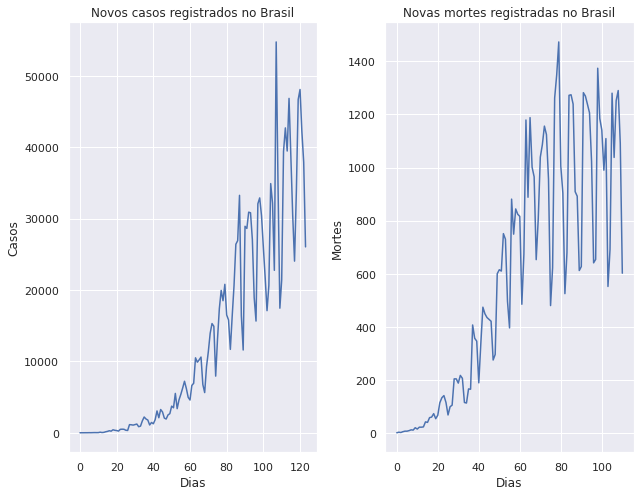

In [ ]:
casos = df_br.new_cases.loc[df_br['new_cases'] != 0.0]
mortes = df_br.new_deaths.loc[df_br['new_deaths'] != 0.0]

x1 = list(range(casos.shape[0]))
x2 = list(range(mortes.shape[0]))

fig, (ax1, ax2)= plt.subplots(nrows=1, ncols=2, figsize=(9,7))

ax1.set_title('Novos casos registrados no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x1,casos)

ax2.set_title('Novas mortes registradas no Brasil')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Mortes')
ax2.plot(x2,mortes)

plt.tight_layout()

## Conclusão

Aparentemente, pela análise realizada acima, a pandemia está longe de acabar:
* O aumento de novos casos ainda é mundial, com o Estados Unidos liderando tanto em número de casos registrados como em número de mortes.
* O Brasil está há mais de 3 meses com um comportamento ascendente e mesmo com dados atualizados até o dia 5 de julho, parece estar longe de entrar em um comportamento estável ou descendente, cenário ideal para a flexibilização do isolamento das pessoas.
